# Import

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [2]:
train = pd.read_csv('../open/train.csv').drop(columns=['SAMPLE_ID'])
test = pd.read_csv('../open/test.csv').drop(columns=['SAMPLE_ID'])

# Data Pre-processing

In [3]:
# datetime 컬럼 처리
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

# datetime 컬럼 제거
train.drop(columns='ATA', inplace=True)
test.drop(columns='ATA', inplace=True)

# Categorical 컬럼 인코딩
categorical_features = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG']


for feature in tqdm(categorical_features, desc="Encoding features"):
    encoder = LabelEncoder()
    train[feature] = encoder.fit_transform(train[feature])
    for label in np.unique(test[feature]):
        if label not in encoder.classes_:
            encoder.classes_ = np.append(encoder.classes_, label)
    test[feature] = encoder.transform(test[feature])

# 결측치 처리
train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)

Encoding features: 100%|█████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.50s/it]


In [4]:
train['OIL'] = train['WTI']+train['DUBAI']+train['BRENT']
test['OIL'] = test['WTI']+test['DUBAI']+test['BRENT']

In [5]:
ship_info = ['SHIP_TYPE_CATEGORY','BREADTH','BUILT','DEADWEIGHT','DEPTH','DRAUGHT','GT','LENGTH','FLAG']

In [6]:
train_data = train[ship_info]

In [7]:
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(train_data)

# K-means

C:\Users\pc\anaconda3\envs\HD\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\envs\HD\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\envs\HD\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\envs\HD\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

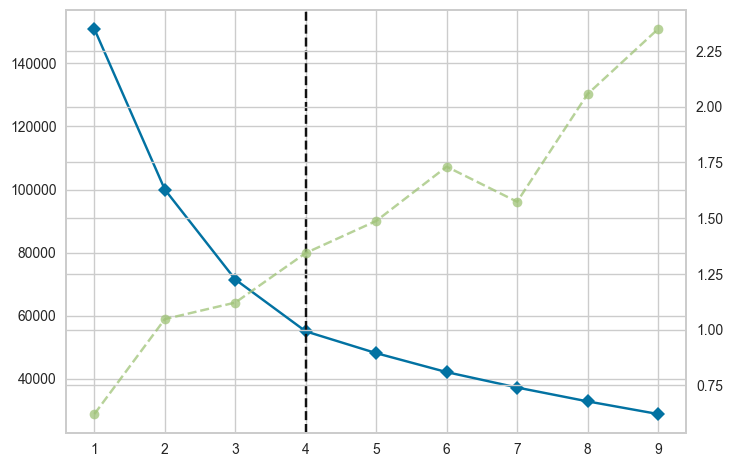

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [9]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
train_data['cluster'] = model.fit_predict(data_scale)

C:\Users\pc\anaconda3\envs\HD\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\envs\HD\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\AppData\Local\Temp\ipykernel_45376\979214012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cluster'] = model.fit_predict(data_scale)


In [17]:
train_data['CI_HOUR'] =train['CI_HOUR']
train_data

C:\Users\pc\AppData\Local\Temp\ipykernel_45376\3336363266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['CI_HOUR'] =train['CI_HOUR']


,SHIP_TYPE_CATEGORY,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,FLAG,cluster,CI_HOUR
0,0,30.0,28,73100,20.0,10.0,38600,220.0,18,1,3.048333
1,2,30.0,15,37900,20.0,10.0,28100,220.0,100,3,17.138611
2,2,50.0,7,115000,20.0,10.0,96400,300.0,65,3,98.827500
3,1,10.0,33,1490,10.0,0.0,700,70.0,79,2,0.000000
4,2,30.0,10,27600,10.0,10.0,19300,180.0,87,2,96.030556
...,...,...,...,...,...,...,...,...,...,...,...
367436,0,40.0,13,93200,20.0,10.0,51300,230.0,65,1,65.850000
367437,3,10.0,9,1280,0.0,0.0,500,60.0,57,2,0.000000
367438,2,30.0,6,25000,20.0,10.0,25100,180.0,25,3,0.997500
367439,1,10.0,8,2400,10.0,0.0,750,80.0,57,2,0.000000


<Axes: xlabel='SHIP_TYPE_CATEGORY', ylabel='BUILT'>

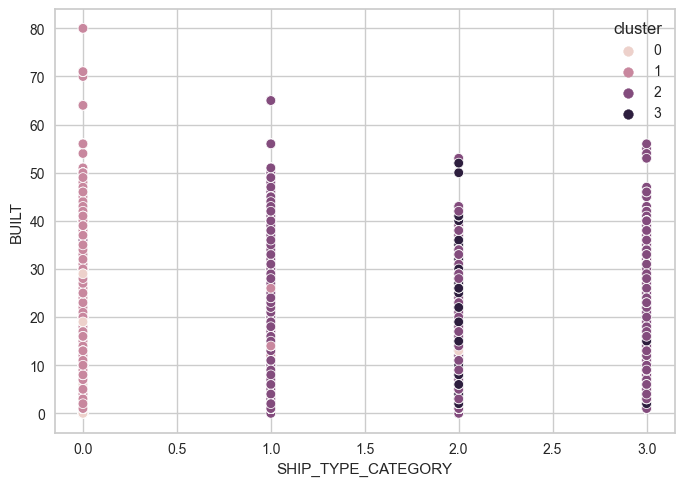

In [24]:
sns.set_style('whitegrid')
sns.scatterplot(data=train_data, x='SHIP_TYPE_CATEGORY', y='BUILT',
                hue='cluster'
               )